In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras import Sequential
from keras.layers import Dense

In [2]:
data = pd.read_csv('/content/gender_classification_v7.csv')

In [3]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


### Converting categorical data to numerical

In [7]:
#data['gender'] = pd.get_dummies(data['gender'])
# Check the unique values in the 'gender' column
print(data['gender'].unique())

# Check the length of the 'gender' column
print(len(data['gender']))

# Check the length of the DataFrame after one-hot encoding
one_hot_data = pd.get_dummies(data['gender'])
print(one_hot_data.shape)


['Male' 'Female']
5001
(5001, 2)


In [8]:
X = data.drop('gender', axis=1)
y = data['gender']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Scaling data before passing to nural network

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [11]:
y_train = y_train.to_numpy()
y_test  = y_test.to_numpy()

## Creating ANN

In [12]:
model = Sequential()
model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 64)                512       
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 633 (2.47 KB)
Trainable params: 633 (2.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
#history = model.fit(X_train, y_train, batch_size=5, validation_data=(X_test, y_test), epochs=10, verbose=1)

from sklearn.preprocessing import OneHotEncoder

# Example: one-hot encode a categorical feature in X_train and X_test
encoder = OneHotEncoder(sparse=False)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Now, you can use X_train_encoded and X_test_encoded in your model.fit method.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
def learning_curve(history, epoch):
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('Epochs')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

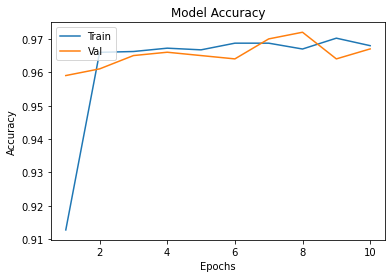

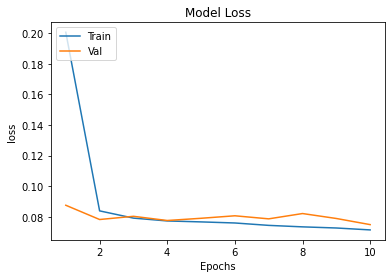

In [ ]:
learning_curve(history, 10)

In [17]:
pred = model.predict(X_test)

32/32 [==============================] - 1s 6ms/step


In [18]:
for i in range(10):
    print('Actual result: ', y_test[i])
    print('Predicted result: ', pred[i])
    print()

Actual result:  Female
Predicted result:  [0.498417]

Actual result:  Male
Predicted result:  [0.511758]

Actual result:  Female
Predicted result:  [0.470253]

Actual result:  Female
Predicted result:  [0.49548972]

Actual result:  Female
Predicted result:  [0.47012085]

Actual result:  Male
Predicted result:  [0.4937581]

Actual result:  Male
Predicted result:  [0.5]

Actual result:  Female
Predicted result:  [0.46670094]

Actual result:  Male
Predicted result:  [0.5321255]

Actual result:  Male
Predicted result:  [0.44261184]

